<a href="https://colab.research.google.com/github/antoniovitorio/Projetos/blob/master/RELATORIO_IMPRESSORA_SS_OPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULO E IMPORTAÇÕES DE BIBLIOTECAS**

In [58]:
%matplotlib inline

In [59]:
pip install pdf_reports -q

In [60]:
from datetime import datetime
from pdf_reports import pug_to_html, write_report

In [61]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import csv

# ***LOCAL DO ARQUIVO PARA ATUALIZAÇÃO DO DATAFRAME***

In [ ]:
#dataframe OPERAÇÃO
DF_OPE = pd.read_excel("/content/sample_data/planilha_ope.xlsx")
DF_OPE

In [ ]:
#dataframe ADM
DF_ADM = pd.read_excel("/content/sample_data/planilha_adm.xlsx")
DF_ADM

In [64]:
DF_OPE.rename (columns= {"User Name": "Usuario",
                        "Type": "Processo",
                       "Print Pages": "Total de Paginas",
                       "Time": "Hora",
                       "Date": "Data",
                       "Job Name": "Nome do Arquivo"	},inplace = True)

In [65]:
DF_ADM.rename (columns= {"User Name": "Usuario",
                        "Type": "Processo",
                       "Print Pages": "Total de Paginas",
                       "Time": "Hora",
                       "Date": "Data",
                       "Job Name": "Nome do Arquivo"	},inplace = True)

In [ ]:
#APRESENTA DADOS DO DATAFRAME OPERAÇÃO
DF_OPE.head()

In [ ]:
#APRESENTA DADOS DO DATAFRAME OPERAÇÃO
DF_ADM.head()

# ***OPERAÇÃO---TOTAL DE PAGINAS POR USUARIO***

In [ ]:
DF_OPE [["Usuario","Processo","Total de Paginas"]]

In [ ]:
plan_dados = DF_OPE [["Usuario","Total de Paginas"]]
plan_dados

In [ ]:
dados_agrupados=plan_dados.groupby(by="Usuario").sum()
dados_agrupados

In [26]:
nova= ['Christian.Cutrim','Cópias','Luis.Franca','Taliane.Lima','davisson.silva','graciele.gomes','marselle.ribeiro','pamela.silva','patricia.oliveira'	]

In [27]:
dados_agrupados.insert(loc=0, column="Nome",value= nova)

In [ ]:
dados_agrupados.head(10)

In [ ]:
#DADOS PARA GERAR GRAFICO 01
dados_org_op = dados_agrupados.sort_values(by='Total de Paginas')
dados_org_op

In [ ]:
#dados_para_grafico_02_para_teste
dados_grafico_02 = dados_agrupados.sort_values(by='Total de Paginas')
dados_grafico_02

In [ ]:
#grafico 01
dados_org_op.plot('Nome','Total de Paginas', kind = 'bar',figsize=(8,5) )

In [ ]:
#grafico 02_para_teste
dados_grafico_02.plot('Nome','Total de Paginas', kind = 'barh',figsize=(8,5) )

**RELATORIO PARA OPE**

In [ ]:
#relatorio
hoje = datetime.now().date()

In [ ]:
#relatorio
html = pug_to_html("/content/sample_data/modelo_de_relatorio_012.pug",
                  dados_org_op=dados_org_op,
                   dados_grafico_02=dados_grafico_02,
                   hoje=hoje)

In [ ]:
#relatorio
html

In [ ]:
#relatorio
write_report(html, "Relatorio_atualizado_Operação.pdf")

# ***ADM---TOTAL DE PAGINAS POR USUARIO***

In [ ]:
DF_ADM [["Usuario","Processo","Total de Paginas"]]

In [ ]:
plan_dados_adm = DF_ADM [["Usuario","Total de Paginas"]]
plan_dados_adm

In [ ]:
dados_agrupados_adm=plan_dados_adm.groupby(by="Usuario").sum()
dados_agrupados_adm

In [74]:
nova= ['ADMINISTRATIVO','Cópias','TREINAMENTO','ascencao.ferreira','brendo.mendonca','damiao.silva','jadna.pinheiro'	]

In [ ]:
dados_agrupados_adm.insert(loc=0, column="Nome",value= nova)

In [ ]:
dados_agrupados_adm.head(10)

In [73]:
dados_org_adm = dados_agrupados_adm.sort_values(by='Total de Paginas')
dados_org_adm

,Nome,Total de Paginas
Usuario,,
ADMINISTRATIVO,ADMINISTRATIVO,1
TREINAMENTO,TREINAMENTO,24
Cópias,Cópias,32
brendo.mendonca,brendo.mendonca\t,175
ascencao.ferreira,ascencao.ferreira,262
jadna.pinheiro,jadna.pinheiro,320
damiao.silva,damiao.silva,520


In [ ]:
#grafico 02 teste
dados_grafico_002 = dados_agrupados_adm.sort_values(by='Total de Paginas')
dados_grafico_002

In [ ]:
#grafico 01
dados_org_adm.plot('Nome','Total de Paginas', kind = 'bar',figsize=(8,5) )

In [ ]:
#grafico 02_para_teste
dados_grafico_002.plot('Nome','Total de Paginas', kind = 'barh',figsize=(8,5) )

**RELATORIO PARA ADM**

In [57]:
#relatorio
hoje = datetime.now().date()

In [ ]:
#relatorio
html = pug_to_html("/content/sample_data/modelo_de_relatorio_012.pug",
                  dados_org_adm=dados_org_adm,
                   dados_grafico_002=dados_grafico_002,
                   hoje=hoje)

In [ ]:
#relatorio
html

In [ ]:
#relatorio
write_report(html, "Relatorio_atualizado_adm.pdf")

# ***MODULO RELATÓRIO***

In [69]:
#relatorio
hoje = datetime.now().date()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


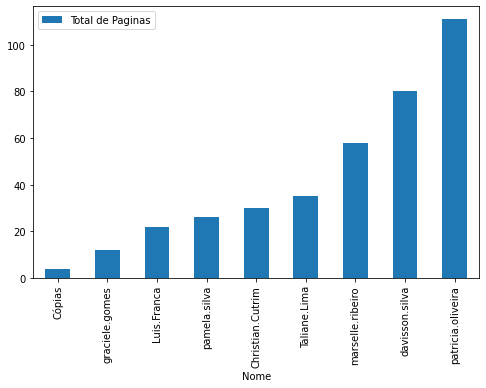

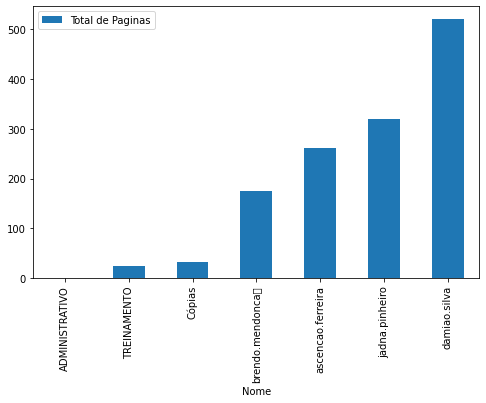

In [70]:
#relatorio
html = pug_to_html("/content/sample_data/Relatorio_Impressoras_ss_op.pug",
                   dados_org_op=dados_org_op,
                   #dados_grafico_02=dados_grafico_02,
                   dados_org_adm=dados_org_adm,
                   #dados_grafico_002=dados_grafico_002,
                   hoje=hoje)

In [ ]:
#relatorio
html

In [72]:
#relatorio
write_report(html, "Relatorio_atualizado_adm.pdf")